The butterworth filter had a frequency response that is as flat as possible, i.e it does not have any ripple in the passband.

The Chebyshev I filter have alot more steeper roll off in the passband than the butterworth. its ripple will disipate in the stopband and its ripple is based on the ripple factor $\epsilon$.which determines the ripple in the passband

The chebyshev II does not roll of as fast as Type I, however it has no ripple in the passband. this comes at a cost of having alot "equiripple" in the stopband. Equiripple is rippple in a filter of equal hight.

The elliptic filter has ripple in both the stopband and passband. thought we can adjust the ripple in each band seperatly, it has teh ability to transition in gain alot faste than other filters inbetween the stop and passband. The filter looks like a combination of Chebyshev I and II. as teh ripple in the stopband is close to zero, it will become a type I chebyshev, and simularily if the ripple in the passband goes close to zero, it becomes a type II

Elliptic filters are alot sharper with its gain, than chebyshev, however chebyshev again is alot sharper than butterworth

The Order of the filters are based on how fast a filter will roll off. it will roll of with 20dB per decades per pole.
The butterworth will gave a lot steeper rolloff inbetween its passband edge frequency and stopband edge frequency
the Chebyshev I will have alot more gain in the stopband as the order increases
the Chebyshev II will have alot more gain in the passband as the order increases
And the elliptic one will have alot more gain in both passband and stopband

the order of these filters are
                    Butterworth Order = 6,
					Chebyshev 1 order =  5,
					Chebyshev 2 Highpass filter order =  5,
					Elliptical Highpass filter order =  4,

					Butterworth Order = 6
					Chebyshev 1 order =  5
					Chebyshev 2 Highpass filter order =  5
					Elliptical Highpass filter order =  4


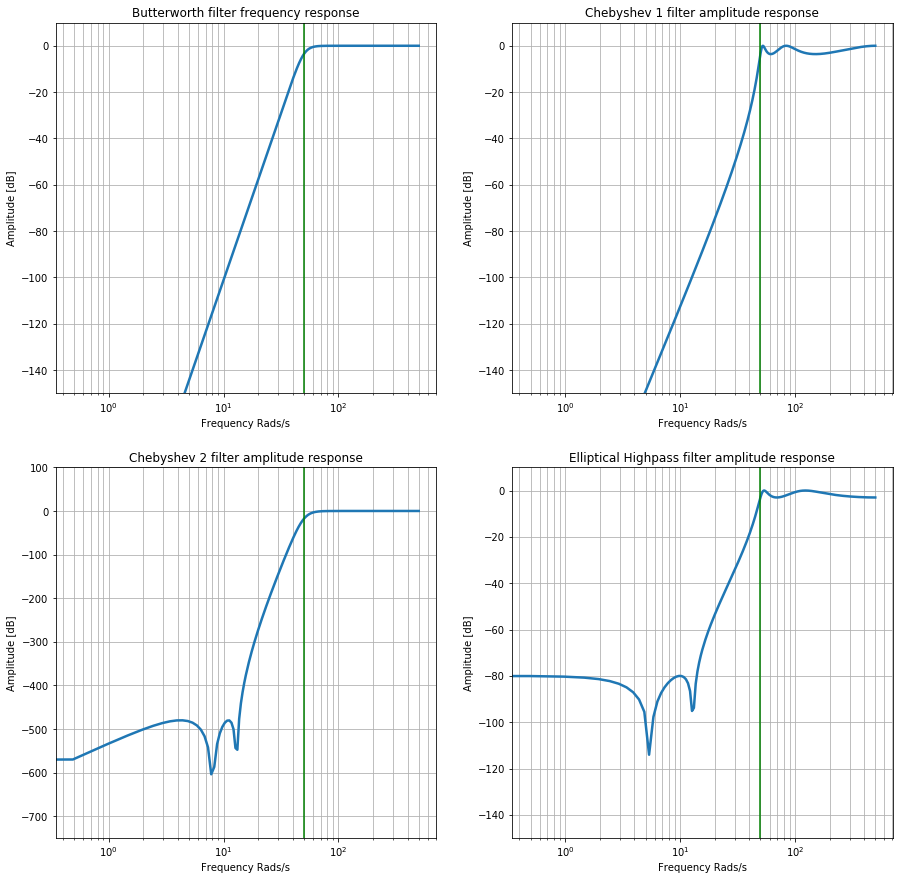

In [15]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

#specifications
Fs = 1000
fp = 50
fs = 10
nyq = Fs/2
gp = 3
gs = 80
wp = fp/nyq
ws = fs/nyq

#constructing butterworth filter
N, Wn = signal.buttord(wp, fs/nyq, gp, gs, fs=None)
b, a = signal.butter(N, Wn, 'highpass', fs=None)

w, h = signal.freqz(b, a, worN=1024)


fig, axs = plt.subplots(2, 2, figsize=(15,15))

#plotting Butterworth
axs[0, 0].semilogx(w/np.pi*nyq, 24 * np.log10(abs(h)), linewidth = 2.5)
axs[0, 0].set_title('Butterworth filter frequency response')
axs[0, 0].set_xlabel('Frequency Rads/s')
axs[0, 0].set_ylabel('Amplitude [dB]')
#axs[0, 0].set_xlim(1e1, nyq)
axs[0, 0].set_ylim(-150, 10)
axs[0, 0].grid(which='both', axis='both')
axs[0, 0].axvline(fp, color='green')

print("\t\t\t\t\tButterworth Order =", N)

#specifications
Fs = 1000
fp = 50
fs = 10
nyq = Fs/2
gp = 3
gs = 80
wp = fp/nyq
ws = fs/nyq

#constructing chebyshev I filter
N, Wn = signal.cheb1ord(wp, ws, gp, gs, fs=None)
b, a = signal.cheby1(N, gp, Wn, 'highpass')

w, h = signal.freqz(b, a, worN=1024)

#Plotting Chebyshev II
axs[0, 1].semilogx(w/np.pi*nyq, 24 * np.log10(abs(h)), linewidth = 2.5,)
axs[0, 1].set_title('Chebyshev 1 filter amplitude response')
axs[0, 1].set_xlabel('Frequency Rads/s')
axs[0, 1].set_ylabel('Amplitude [dB]')
#axs[0, 1].set_xlim(1e1, nyq)
axs[0, 1].set_ylim(-150, 10)
axs[0, 1].grid(which='both', axis='both')
axs[0, 1].axvline(fp, color='green')

print("\t\t\t\t\tChebyshev 1 order = ", N)

#specifications
Fs = 1000
fp = 50
fs = 10
nyq = Fs/2
gp = 3
gs = 80
wp = fp/nyq
ws = fs/nyq

#constructing chebyshev II filter
N, Wn = signal.cheb2ord(wp, ws, gp, gs, fs=None)
b, a = signal.cheby2(N, gs, Wn, 'highpass')

w, h = signal.freqz(b, a, worN=1024)

#Plotting chebyshev II
axs[1, 0].semilogx(w/np.pi*nyq, 120* np.log10(abs(h)), linewidth = 2.5)
axs[1, 0].set_title('Chebyshev 2 filter amplitude response')
axs[1, 0].set_xlabel('Frequency Rads/s')
axs[1, 0].set_ylabel('Amplitude [dB]')
#axs[1, 0].set_xlim(1e1, nyq)
axs[1, 0].set_ylim(-750, 100)
axs[1, 0].grid(which='both', axis='both')
axs[1, 0].axvline(fp, color='green')

print("\t\t\t\t\tChebyshev 2 Highpass filter order = ", N)

#Specifications
Fs = 1000
fp = 50
fs = 10
nyq = Fs/2
gp = 3
gs = 80
wp = fp/nyq
ws = fs/nyq

#Constructing Elliptic filter
N, Wn = signal.ellipord(wp, ws, gp, gs, fs=None)
b, a = signal.ellip(N, gp, gs, Wn, 'highpass')

w, h = signal.freqz(b, a, worN=1024)

#plotting Elliptic filter
axs[1, 1].semilogx(w/np.pi*nyq, 20* np.log10(abs(h)), linewidth = 2.5)
axs[1, 1].set_title('Elliptical Highpass filter amplitude response')
axs[1, 1].set_xlabel('Frequency Rads/s')
axs[1, 1].set_ylabel('Amplitude [dB]')
#axs[1, 1].set_xlim(1e1, nyq)
axs[1, 1].set_ylim(-150, 10)
axs[1, 1].grid(which='both', axis='both')
axs[1, 1].axvline(fp, color='green')

print("\t\t\t\t\tElliptical Highpass filter order = ", N)
